# Linear Congruential Generator

$$x_{n+1} = (a \cdot x_n + c) \mod m$$

- $m, 0 \lt m$ - modulus
- $a, 0 \lt a \lt m$ - multiplier
- $c, 0 \le c \lt m$ - increment
- $X_0, 0 \le X_0 \lt m$ - seed (most often system clock)

***

### glibc parameters
- $m=2^{31}$
- $a=1103515245$
- $c=12345$

### [List of parameters (wiki)](https://en.wikipedia.org/wiki/Linear_congruential_generator#Parameters_in_common_use)

In [99]:
from time import time
import matplotlib.pyplot as plt

class LCG:

    def __init__(self, a=1103515245, c=12345, m=2**31, seed=None):
        self.a = a
        self.c = c
        self.m = m
        self.seed = seed if seed is not None else int(time() * 1e5)

    def _random_generator(self):
        while True:
            self.seed = (self.a * self.seed + self.c) % self.m
            yield self.seed

    def _random_uniform_generator(self):
        while True:
            self.seed = (self.a * self.seed + self.c) % self.m
            yield self.seed / self.m

    def random(self, samples=None):
        if samples is not None:
            return [next(self._random_generator()) for _ in range(samples)]
        else:
            return next(self._random_generator())
    
    def random_uniform(self, samples=None):
        if samples is not None:
            return [next(self._random_uniform_generator()) for _ in range(samples)]
        else:
            return next(self._random_uniform_generator())

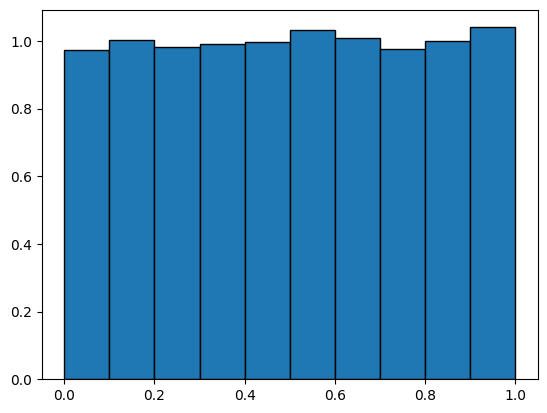

In [114]:
lcg = LCG()

uniform_random = lcg.random_uniform(samples=10000)
plt.hist(uniform_random, edgecolor="black", density=True)
plt.show()